In [73]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix



In [39]:
df = pd.read_csv('breast_cancer.csv')

In [33]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [62]:
X = df.drop(['Class','Sample code number'],axis=1)
y = df['Class'].dropna()


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=0)

In [65]:
classificador = GradientBoostingClassifier()
classificador.fit(X_train,y_train)

GradientBoostingClassifier()

In [69]:
y_pred = classificador.predict(X_test)

In [70]:
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2])

In [71]:
y_test

113    2
378    2
303    4
504    4
301    2
      ..
21     4
454    2
506    2
500    4
77     2
Name: Class, Length: 137, dtype: int64

In [74]:
mc = confusion_matrix(y_test, y_pred)

In [75]:
mc

array([[84,  3],
       [ 3, 47]])

<Axes: >

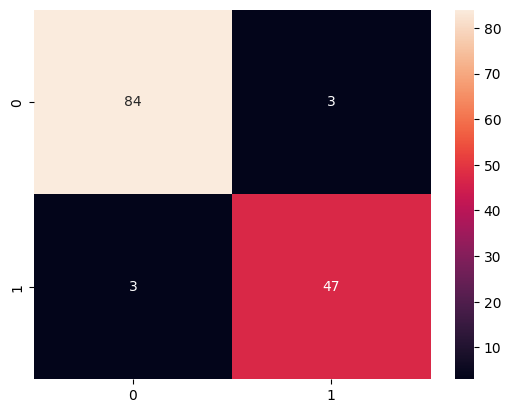

In [76]:
sns.heatmap(mc, annot=True)

In [77]:
# 6 previsões incorretas. 

In [78]:
(84+48)/137

0.9635036496350365

In [79]:
1-6/137

0.9562043795620438